# Introduction:

The main goal of this project is to create a prediction algorithm using a linear regression model. The dataset was obtained from Kaggle, which contains data on used Honda cars. The model will be used to predict the price using the given variables. 

To create a linear regression, the following main steps must be performed:
- Clean the data for processing (null values, change any unusable data types)
- Explore the dataset with graphs, summary statistics, and correlations
- Linear Regression preprocessing (separate predictors from target, one hot encoding, standardization)
- Linear Regression model and analysis (split into train and test, run model, analyze results)


### Importing Modules
These are the main modules that will be used in the data cleaning portion, along with the rest of the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn_pandas import DataFrameMapper

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Loading the data
The data from file `honda_sell_data.csv` will be used to create the dataframe named `honda_data`

The kaggle url is: https://www.kaggle.com/datasets/omartorres25/honda-data

In [2]:
honda_data = pd.read_csv('honda_sell_data.csv')

### Summary Statistics of initial Dataframe
The first 5 rows of the dataframe will be displayed, along with summary statistics of each column and the data types, null values, and columns will be explored

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

display(honda_data.head(5))
display(honda_data.describe(include='all'))
display(honda_data.info())

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Transmission,Engine,VIN,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,NaN,Gasoline,Automatic,3.5L V6 24V GDI SOHC,5FPYK3F58PB011817,00830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H5XPH702953,6402953,–,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H55PH704805,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,19–25,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF6H82NB100429,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H90PH805954,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Transmission,Engine,VIN,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
count,4999.000000,4999,4999,4999,4999,4999.000000,4999.000000,4988,4988,4988,3514,4988,4988,4988,4988,4988,4988,4447.00000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4926,4926
unique,NaN,1,146,3,2333,NaN,NaN,172,62,7,125,7,58,75,4988,4966,2416,NaN,NaN,NaN,NaN,NaN,NaN,53,2
top,NaN,Honda,CR-V EX-L,New,"$41,770",NaN,NaN,Platinum White Pearl,Black,Front-wheel Drive,19–26,Gasoline,Automatic CVT,3.5L V6 24V GDI SOHC,5FPYK3F58PB011817,Adaptive Cruise Control,5,NaN,NaN,NaN,NaN,NaN,NaN,CA,Dealer
freq,NaN,4999,268,2697,70,NaN,NaN,892,2889,2327,540,4393,1823,1898,1,2,463,NaN,NaN,NaN,NaN,NaN,NaN,330,4920
mean,2020.507702,NaN,NaN,NaN,NaN,4.569654,1288.366673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.81754,4.706814,4.663931,4.580976,4.731954,4.866269,NaN,NaN
std,3.711361,NaN,NaN,NaN,NaN,0.542453,1969.998095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25903,0.476941,0.351680,0.372107,0.313093,0.190886,NaN,NaN
min,1981.000000,NaN,NaN,NaN,NaN,1.200000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.80000,3.000000,3.600000,3.600000,3.900000,4.000000,NaN,NaN
25%,2019.000000,NaN,NaN,NaN,NaN,4.400000,126.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70000,4.700000,4.500000,4.200000,4.600000,4.800000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,NaN,4.700000,697.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.90000,4.800000,4.800000,4.600000,4.800000,5.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,NaN,4.900000,1695.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Model                    4999 non-null   object 
 3   Condition                4999 non-null   object 
 4   Price                    4999 non-null   object 
 5   Consumer_Rating          4999 non-null   float64
 6   Consumer_Review_#        4999 non-null   int64  
 7   Exterior_Color           4988 non-null   object 
 8   Interior_Color           4988 non-null   object 
 9   Drivetrain               4988 non-null   object 
 10  MPG                      3514 non-null   object 
 11  Fuel_Type                4988 non-null   object 
 12  Transmission             4988 non-null   object 
 13  Engine                   4988 non-null   object 
 14  VIN                     

None

## Comments based on summary statistics:

- Price, MPG, and mileage should have data type of integer or float, not object
- All other datatypes are acceptable at this point
- MPG has about 1500 null values - to be expored further 
- Ratings each have about 500 null values - to be explored further
- The following columns will not be useful for creating the linear regression:
    - Make (every automobile in this dataset is Honda - this would be a 0 variance variable)
    - Consumer review # (The available number of reviews does not play into the price of a vehicle)
    - VIN (The VIN is unique to each vehicle, and cannot provide information on the price)
    - Stock # (This value is used to track vehicles in the system, and doesn't provide meaningful information)
    - Seller Type (Almost all values are listed as 'Dealer' which is similar to the Make column, an almost 0 variance variable)

### The price column will be modified to a quantitative data type

In [4]:
#First need to remove $ in front of Price values using regex, all characters that are not digits are removed
honda_data.Price = honda_data['Price'].str.replace('[\D]', '', regex=True)
display(honda_data.Price.head(10))

0    46370
1    34150
2    34245
3    46500
4    40395
5    42250
6    34090
7    39845
8    40240
9    34700
Name: Price, dtype: object

In [5]:
# Column data type is adjusted to numeric - float
honda_data['Price'] = pd.to_numeric(honda_data.Price)
print((honda_data.Price.dtype))

float64


### Next, the MPG column is adjusted to a numeric data type

In [6]:
# The MPG is given as a range, because there is a difference between city and highway
# This column will be split into 2, and then the higher value will be used to create a new column to be used in the model
honda_data[['MPG1', 'MPG2']] = honda_data.MPG.str.split('–', expand=True)

In [7]:
honda_data['MPG_max']= np.where(honda_data.MPG1 > honda_data.MPG2, honda_data.MPG1, honda_data.MPG2)

In [8]:
honda_data['MPG_max'] = pd.to_numeric(honda_data.MPG_max)

In [9]:
honda_data.MPG_max.dtype

dtype('float64')

### Finally, the Mileage column is adjusted to a numeric data type

In [10]:
# Replacing values in Mileage that are listed as '–', with 0 because they are new cars
honda_data['Mileage'] = honda_data['Mileage'].str.replace('–', '')

In [11]:
# honda_data['Mileage'] = pd.to_numeric(honda_data.Mileage)
# This line causes an error, because there are still non numeric characters

In [12]:
honda_data['Mileage'].isna().sum()

11

In [13]:
# Dropping rows with null values in Mileage
honda_data.dropna(subset=['Mileage'], inplace=True)

In [14]:
# Previewing rows with non digit characters in Mileage column
honda_data[~honda_data.Mileage.str.contains('\d', regex=True)].head(10)

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Transmission,Engine,VIN,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type,MPG1,MPG2,MPG_max
1,2023,Honda,CR-V Hybrid Sport,New,34150.0,1.7,24,Platinum White Pearl,Black,FWD,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H5XPH702953,6402953,,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN,NaN
6,2023,Honda,CR-V Hybrid Sport,New,34090.0,4.4,12,Urban Gray Pearl,Black,FWD,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H56PH703596,5703596A,,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN,NaN
7,2023,Honda,CR-V Hybrid Sport Touring,New,39845.0,1.2,70,Crystal Black Pearl,Black,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H9XPH805315,2905315X,,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN,NaN
8,2023,Honda,CR-V Hybrid Sport Touring,New,40240.0,1.2,70,Platinum White Pearl,Black,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H97PH800573,2900573X,,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN,NaN
9,2023,Honda,CR-V Hybrid Sport,New,34700.0,1.2,70,Urban Gray Pearl,Black,FWD,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H54PH703791,2903791,,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN,NaN
10,2023,Honda,CR-V Hybrid Sport Touring,New,40850.0,1.2,70,Still Night Pearl,Black,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,7FARS6H91PE003271,2903271X,,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN,NaN
11,2023,Honda,Pilot Elite,New,53375.0,1.2,70,Modern Steel Metallic,Black,AWD,NaN,Gasoline,10-Speed Automatic,3.5L V6 24V GDI DOHC,5FNYG1H83PB005557,30444,,NaN,NaN,NaN,NaN,NaN,NaN,CA,Dealer,NaN,NaN,NaN
16,2023,Honda,Pilot TrailSport,New,50150.0,4.6,985,Sky,Black,All-wheel Drive,NaN,Gasoline,10-Speed Automatic,3.5L V6 24V GDI DOHC,5FNYG1H62PB000395,2C0289,,NaN,NaN,NaN,NaN,NaN,NaN,CO,Dealer,NaN,NaN,NaN
37,2023,Honda,Accord EX,New,30705.0,4.8,723,Obsidian Blue Pearl,Black,Front-wheel Drive,NaN,Gasoline,Automatic CVT,1.5L I4 16V DOHC,1HGCY1F35PA003379,P0221,,NaN,NaN,NaN,NaN,NaN,NaN,MO,Dealer,NaN,NaN,NaN
38,2022,Honda,Passport Elite,New,47050.0,5.0,2599,Platinum White Pearl,Black,All-wheel Drive,19–24,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF8H07NB003457,Z02724-28,,5.0,5.0,4.9,5.0,4.9,5.0,TX,Dealer,19,24,24.0


In [15]:
# Dropping few rows with mislabeled columns
honda_data = honda_data[honda_data.Mileage.str.contains('\d', regex=True)]

In [16]:
honda_data['Mileage'] = pd.to_numeric(honda_data.Mileage)

In [17]:
honda_data.Mileage.dtype

dtype('int64')

### Exploring null values in MPG column

In [18]:
honda_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 4998
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4701 non-null   int64  
 1   Make                     4701 non-null   object 
 2   Model                    4701 non-null   object 
 3   Condition                4701 non-null   object 
 4   Price                    4662 non-null   float64
 5   Consumer_Rating          4701 non-null   float64
 6   Consumer_Review_#        4701 non-null   int64  
 7   Exterior_Color           4701 non-null   object 
 8   Interior_Color           4701 non-null   object 
 9   Drivetrain               4701 non-null   object 
 10  MPG                      3430 non-null   object 
 11  Fuel_Type                4701 non-null   object 
 12  Transmission             4701 non-null   object 
 13  Engine                   4701 non-null   object 
 14  VIN                     

In [19]:
# See why there are about 1500 null MPG values
# Sort by null values in MPG_max column - see value counts for each column
honda_data['Has_MPG'] = ~honda_data.MPG_max.isnull()

In [20]:
# Grouping by year, to determine if the value is missing for specific years
honda_groupby_year = honda_data.groupby(['Year', 'Has_MPG']).count().reset_index()
display(honda_groupby_year)

,Year,Has_MPG,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Transmission,Engine,VIN,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type,MPG1,MPG2,MPG_max
0,1981,False,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0
1,1987,False,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0
2,1989,False,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
3,1991,False,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
4,1992,True,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1993,True,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1997,False,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
7,1997,True,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,1998,True,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
9,1999,True,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


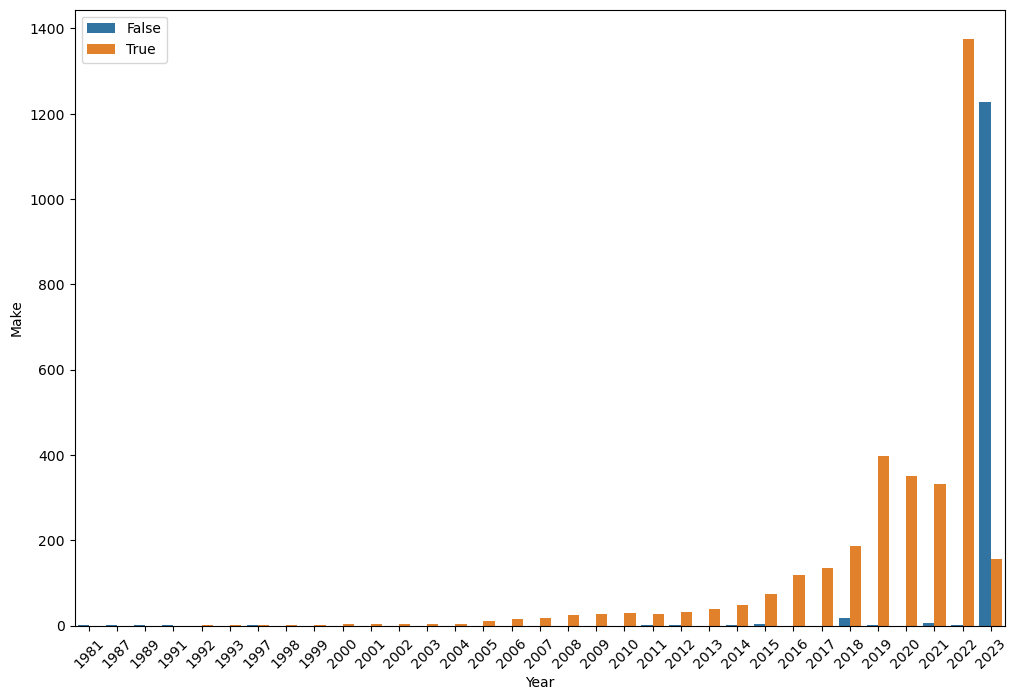

In [21]:
# Bar Graph (Has MPG (True) / Doesn't have MPG (False) --2 Colors separating these values) Count vs Year
import seaborn as sns
figure = plt.figure(figsize=(12,8))
sns.barplot(data=honda_groupby_year, x='Year', y='Make', hue='Has_MPG')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

Seems that most of the null MPG values are in the latest Year (2023)

Potentially because the cars do not have that information available yet, or they are not tested

Cars should have values close or exactly the same, to values from the exact same model in the same year (if existing), or previous year values, from exact same model, if available

In [22]:
# Define function to add MPG value where missing:
# Adds the value of the exact model, for the same year if available, and the previous year if the same year is unavailable
# Otherwise, leaves the value as null for further processing 

def add_MPG(row):
    if pd.isna(row['MPG_max']):
        try:
            return honda_data[(honda_data.Year == (row['Year'])) \
                              & (honda_data.Model == row['Model']) \
                              & (honda_data.MPG_max.notnull())].MPG_max.iloc[0]
        except IndexError:
            try: 
                return honda_data[(honda_data.Year == (row['Year']-1)) \
                              & (honda_data.Model == row['Model']) \
                              & (honda_data.MPG_max.notnull())].MPG_max.iloc[0]
            except IndexError: 
                return np.nan
    else: return row['MPG_max']

In [23]:
# Apply function to each row , for the MPG_max column
honda_data['MPG_max'] = honda_data.apply(add_MPG, axis=1)

In [24]:
honda_data.MPG_max.value_counts()

24.0    662
26.0    627
28.0    474
32.0    470
25.0    376
40.0    278
35.0    259
37.0    241
27.0    182
38.0    157
34.0    127
44.0    118
31.0    117
36.0     79
30.0     67
42.0     61
33.0     59
43.0     46
55.0     42
51.0     40
39.0     40
48.0     30
23.0     28
41.0     18
0.0      17
49.0     11
21.0     11
29.0     10
20.0      9
22.0      8
47.0      6
46.0      1
8.0       1
50.0      1
19.0      1
45.0      1
Name: MPG_max, dtype: int64

Value counts of MPG_max column show there are 17 with a value of 0 - these should be evaluated further

In [25]:
honda_data[honda_data.MPG_max == 0].head(10)

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Transmission,Engine,VIN,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type,MPG1,MPG2,MPG_max,Has_MPG
715,2018,Honda,Clarity Plug-In Hybrid Touring,Used,21998.0,4.4,1138,Crystal Black Pearl,Black,Front-wheel Drive,0–0,Hybrid,Variable,Gas/Electric I-4 1.5 L/91,JHMZC5F36JC005943,N2639A,51860,4.8,4.7,4.6,4.6,4.4,4.7,TX,Dealer,0,0,0.0,True
803,2018,Honda,Clarity Plug-In Hybrid Touring,Used,24990.0,4.0,9531,Green,Beige,Front-wheel Drive,NaN,Hybrid,Automatic CVT,1.5L I4 16V MPFI DOHC Hybrid,JHMZC5F35JC024032,2001974581,56576,4.8,4.7,4.6,4.6,4.4,4.7,NaN,NaN,NaN,NaN,0.0,False
1245,2018,Honda,Clarity Plug-In Hybrid Touring,Used,25990.0,4.0,9531,Silver,Black,Front-wheel Drive,NaN,Hybrid,Automatic CVT,1.5L I4 16V MPFI DOHC Hybrid,JHMZC5F35JC008865,2002134248,37921,4.8,4.7,4.6,4.6,4.4,4.7,NaN,NaN,NaN,NaN,0.0,False
1355,2018,Honda,Clarity Plug-In Hybrid Touring,Used,19997.0,4.1,164,Gray,–,Front-wheel Drive,NaN,Hybrid,Automatic CVT,1.5L I4 16V MPFI DOHC Hybrid,JHMZC5F3XJC009607,N4110425A,78977,4.8,4.7,4.6,4.6,4.4,4.7,TN,Dealer,NaN,NaN,0.0,False
1903,2019,Honda,Clarity Plug-In Hybrid Touring,Used,26333.0,4.3,232,Solar Silver Metallic,Black,Front-wheel Drive,NaN,Hybrid,Automatic CVT,1.5L I4 16V MPFI DOHC Hybrid,JHMZC5F3XKC004960,P64938,54910,4.9,4.9,4.9,5.0,4.7,5.0,CA,Dealer,NaN,NaN,0.0,False
2338,1992,Honda,Prelude Si 4WS,Used,18900.0,4.7,0,White,Red,Front-wheel Drive,0–0,Gasoline,Manual,2.2 H22A,0000000BB11101577,101577,86364,4.3,4.5,4.9,5.0,5.0,4.6,AR,Dealer,0,0,0.0,True
2778,2018,Honda,Clarity Plug-In Hybrid Touring,Used,25994.0,4.8,801,Crystal Black Pearl,Black,Front-wheel Drive,NaN,Hybrid,Automatic CVT,1.5L I4 16V MPFI DOHC Hybrid,JHMZC5F31JC007566,10544A,39267,4.8,4.7,4.6,4.6,4.4,4.7,NY,Dealer,NaN,NaN,0.0,False
2780,2018,Honda,Clarity Plug-In Hybrid Touring,Used,20540.0,4.0,210,Crystal Black Pearl,Beige,Front-wheel Drive,NaN,Hybrid,Automatic CVT,1.5L I4 16V MPFI DOHC Hybrid,JHMZC5F38JC012666,AP10021,75291,4.8,4.7,4.6,4.6,4.4,4.7,NY,Dealer,NaN,NaN,0.0,False
2978,2018,Honda,Clarity Plug-In Hybrid Touring,Used,23495.0,4.5,682,Platinum White Pearl,Beige,Front-wheel Drive,NaN,Hybrid,Automatic CVT,1.5L I4 16V MPFI DOHC Hybrid,JHMZC5F3XJC010109,VC21498,45515,4.8,4.7,4.6,4.6,4.4,4.7,NY,Dealer,NaN,NaN,0.0,False
3199,2018,Honda,Clarity Plug-In Hybrid Touring,Used,26906.0,4.7,4,Modern Steel Metallic,Black,Front-wheel Drive,0–0,Hybrid,e continuously variable (e cvt),4 Cylinder Engine,JHMZC5F31JC011391,JC011391P,44095,4.8,4.7,4.6,4.6,4.4,4.7,CA,Dealer,0,0,0.0,True


In [26]:
hybrid_touring_MPG_df = honda_data[honda_data.Model.str.contains('Hybrid') & honda_data.Model.str.contains('Touring')].reset_index()
display(hybrid_touring_MPG_df.head(10))

,index,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Transmission,Engine,VIN,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type,MPG1,MPG2,MPG_max,Has_MPG
0,4,2023,Honda,CR-V Hybrid Sport Touring,New,40395.0,4.4,12,Crystal Black Pearl,Black,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H90PH805954,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN,40.0,False
1,17,2023,Honda,CR-V Hybrid Sport Touring,New,40939.0,4.5,1972,Platinum White Pearl,–,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H97PH800251,PH800251,15,5.0,3.0,4.0,4.0,5.0,5.0,CO,Dealer,NaN,NaN,40.0,False
2,25,2023,Honda,CR-V Hybrid Sport Touring,New,40239.0,4.4,5,Platinum White Pearl,Black,All-wheel Drive,40–34,Hybrid,electronic continuously variable,4 Cylinder Engine,2HKRS6H94PH800174,23023,7,5.0,3.0,4.0,4.0,5.0,5.0,OK,Dealer,40,34,40.0,True
3,84,2023,Honda,CR-V Hybrid Sport Touring,New,40240.0,4.4,38,Platinum White Pearl,Gray,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,7FARS6H94PE000459,53069,25,5.0,3.0,4.0,4.0,5.0,5.0,IN,Dealer,NaN,NaN,40.0,False
4,86,2023,Honda,CR-V Hybrid Sport Touring,New,40240.0,5.0,4402,Urban Gray Pearl,Black,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H9XPH800356,9760,176,5.0,3.0,4.0,4.0,5.0,5.0,GA,Dealer,NaN,NaN,40.0,False
5,107,2023,Honda,CR-V Hybrid Sport Touring,New,39845.0,4.8,2700,Meteorite Gray Metallic,Black,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H91PH800231,H05130,16,5.0,3.0,4.0,4.0,5.0,5.0,TX,Dealer,NaN,NaN,40.0,False
6,134,2023,Honda,CR-V Hybrid Sport Touring,New,39845.0,4.8,3335,Lunar Silver Metallic,Black,All-wheel Drive,40–34,Hybrid,Variable,Gas/Electric I-4 2.0 L/122,2HKRS6H91PH800343,QG23185,0,5.0,3.0,4.0,4.0,5.0,5.0,GA,Dealer,40,34,40.0,True
7,135,2023,Honda,CR-V Hybrid Sport Touring,New,40240.0,4.8,3335,Platinum White Pearl,Black,All-wheel Drive,40–34,Hybrid,Variable,Gas/Electric I-4 2.0 L/122,2HKRS6H93PH801655,QG23260,0,5.0,3.0,4.0,4.0,5.0,5.0,GA,Dealer,40,34,40.0,True
8,137,2023,Honda,CR-V Hybrid Sport Touring,New,41688.0,4.6,1097,Crystal Black Pearl,–,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H9XPH800437,27289,5,5.0,3.0,4.0,4.0,5.0,5.0,GA,Dealer,NaN,NaN,40.0,False
9,138,2023,Honda,CR-V Hybrid Sport Touring,New,39845.0,4.8,1152,Crystal Black Pearl,Black,All-wheel Drive,NaN,Hybrid,–,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H98PH800436,H800436,3,5.0,3.0,4.0,4.0,5.0,5.0,GA,Dealer,NaN,NaN,40.0,False


Seems that all 0 values are of the same Model

Values will be imputed with closest type of car - 2018 Hybrid Touring

In [27]:
hybrid_touring_MPG = hybrid_touring_MPG_df.loc[0, 'MPG_max']
display(hybrid_touring_MPG)

40.0

In [28]:
honda_data.MPG_max.replace(0, hybrid_touring_MPG, inplace=True)

In [29]:
# Checking how many null values are in MPG_max column
print(honda_data.MPG_max.isna().value_counts())

False    4675
True       26
Name: MPG_max, dtype: int64


In [30]:
honda_data = honda_data[~honda_data.MPG_max.isna()]

In [31]:
honda_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4675 entries, 0 to 4998
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4675 non-null   int64  
 1   Make                     4675 non-null   object 
 2   Model                    4675 non-null   object 
 3   Condition                4675 non-null   object 
 4   Price                    4636 non-null   float64
 5   Consumer_Rating          4675 non-null   float64
 6   Consumer_Review_#        4675 non-null   int64  
 7   Exterior_Color           4675 non-null   object 
 8   Interior_Color           4675 non-null   object 
 9   Drivetrain               4675 non-null   object 
 10  MPG                      3430 non-null   object 
 11  Fuel_Type                4675 non-null   object 
 12  Transmission             4675 non-null   object 
 13  Engine                   4675 non-null   object 
 14  VIN                     

### Further data cleaning:
Deletion of selected columns, further exploration of columns that could be used in regression

In [32]:
# The following columns will be dropped from the dataframe, as they have no use for the linear regression - as explained above
honda_data.drop(columns=['MPG', 'MPG1', 'MPG2', 'Has_MPG', 'VIN', 'Seller_Type', 'Stock_#', 'Make', 'Consumer_Review_#'], inplace=True)

In [33]:
# Dropping rows for an insignificant amount of values that are null
honda_data.dropna(subset=['Price', 'State'], inplace=True)
print(honda_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4575 non-null   int64  
 1   Model                    4575 non-null   object 
 2   Condition                4575 non-null   object 
 3   Price                    4575 non-null   float64
 4   Consumer_Rating          4575 non-null   float64
 5   Exterior_Color           4575 non-null   object 
 6   Interior_Color           4575 non-null   object 
 7   Drivetrain               4575 non-null   object 
 8   Fuel_Type                4575 non-null   object 
 9   Transmission             4575 non-null   object 
 10  Engine                   4575 non-null   object 
 11  Mileage                  4575 non-null   int64  
 12  Comfort_Rating           4134 non-null   float64
 13  Interior_Design_Rating   4134 non-null   float64
 14  Performance_Rating      

In [34]:
# The following columns will be dropped
# They have approximately 500 null ratings, and it would not be appropriate to impute values
# Reason being that year to year, models can change and have a different rating, so the results could become skewed
# Possibly these values could be imputed with further research
honda_data.drop(columns=['Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating', 'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating'], inplace=True) 

In [35]:
honda_data.Exterior_Color.value_counts()

Platinum White Pearl                                  831
Crystal Black Pearl                                   543
Lunar Silver Metallic                                 327
Sonic Gray Pearl                                      310
Modern Steel Metallic                                 277
Gray                                                  237
White                                                 222
Black                                                 210
Silver                                                121
Still Night Pearl                                     103
Obsidian Blue Pearl                                   101
Blue                                                   95
–                                                      88
Radiant Red Metallic                                   74
Radiant Red Metallic II                                69
White Diamond Pearl                                    60
Red                                                    58
Platinum White

In [36]:
honda_data.Interior_Color.value_counts()

Black                           2593
Gray                             739
–                                692
Beige                            197
Ivory                             78
Black / Red                       63
Mocha                             47
Tan                               16
Red / Black                       16
Black/Red                         16
Blk Lth                           13
Black / Gray                      10
Red                                9
Nh-883p/Black                      7
Truffle                            6
Black / Ivory                      6
Grey                               5
Gray / Blue                        4
Brown                              4
Blue                               3
Blk Fabric W/Synthetic Lt          3
Select                             2
NH-912P/BLACK                      2
Cream                              2
Silver                             2
NH-731P/BLACK                      2
Titanium                           2
G

In [37]:
# Exterior and Interior Color of car is dropped
# There are numerous values that are slight variations of basic categories of colors
# Additional work could be done to filter all colors into "bins"(i.e. Red, Blue, Green, Gray, Black, Yellow)
# These rows with null values are not simply dropped, because it could skew the data and omit certain types of models
honda_data.drop(columns=['Exterior_Color', 'Interior_Color'], inplace=True) 

In [38]:
# Engine, Transmission, Model columns are dropped
# Reasoning is similar to the colors, where there are many values for each variable, that could be filtered into bins
honda_data.drop(columns=['Transmission', 'Engine', 'Model'], inplace=True)

In [39]:
honda_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             4575 non-null   int64  
 1   Condition        4575 non-null   object 
 2   Price            4575 non-null   float64
 3   Consumer_Rating  4575 non-null   float64
 4   Drivetrain       4575 non-null   object 
 5   Fuel_Type        4575 non-null   object 
 6   Mileage          4575 non-null   int64  
 7   State            4575 non-null   object 
 8   MPG_max          4575 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 357.4+ KB


# Analysis of Data
First, EDA will be done by creating some visualizations of each feature and how to compare to the price values.

## List of Graphs that will be created:
#1 Histogram of prices

#2 Price vs Year

#3 Price vs Drive Train

#4 Price vs Fuel Type

#5 Price vs Mileage

#6 Price vs State

#7 Price vs MPG Max

#8 Price vs Condition


## 1 Histogram of Prices

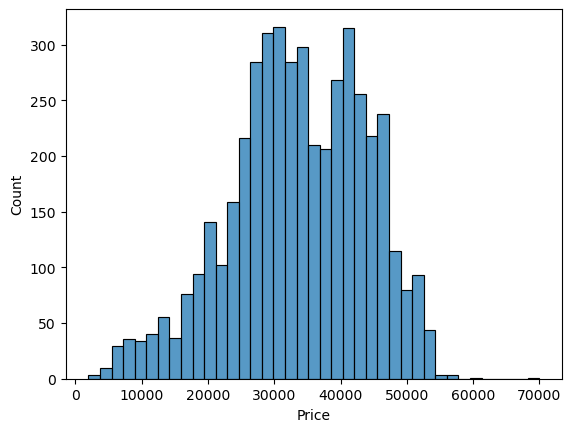

<Figure size 640x480 with 0 Axes>

In [40]:
sns.histplot(honda_data.Price)
plt.show()
plt.clf()

- Plot seems to have a potentially biomodal distribution for prices
- Also it has a slightly left skewed distribution

## 2 Price vs Year

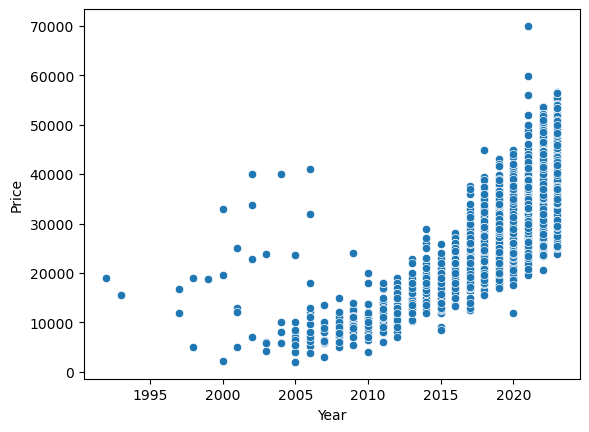

<Figure size 640x480 with 0 Axes>

In [41]:
sns.scatterplot(x=honda_data.Year, y=honda_data.Price)
plt.show()
plt.clf()

Prices tend to increase with newer years for automobiles, there are some which are outliers, which could be
- More of a luxury model
- Collectible versions
- Or possibly errors in the data

## 3 Price vs Drive Train


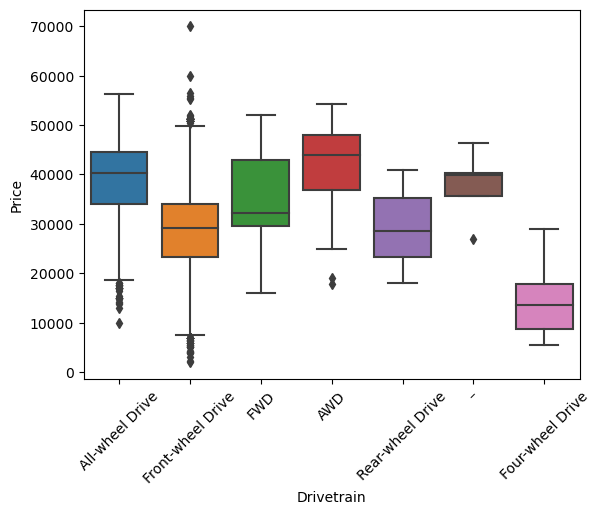

<Figure size 640x480 with 0 Axes>

In [42]:
sns.boxplot(x=honda_data.Drivetrain, y=honda_data.Price)
plt.xticks(rotation=45)
plt.show()
plt.clf()

- All-wheel drive is the same as AWD and Front-wheel Drive is the same as FWD
- Should change those values to be exactly the same so it doesn't show up as separate values, and the "-" is to be removed

In [43]:
honda_data.Drivetrain.value_counts()

Front-wheel Drive    2162
All-wheel Drive      2108
FWD                   134
AWD                    83
Four-wheel Drive       71
Rear-wheel Drive       12
–                       5
Name: Drivetrain, dtype: int64

In [44]:
Drivetrain_Dict = {'FWD': 'Front-wheel Drive', 'AWD': 'All-wheel Drive', 'Front-wheel Drive': 'Front-wheel Drive', 'All-wheel Drive': 'All-wheel Drive', 'Four-wheel Drive': 'Four-wheel Drive', 'Rear-wheel Drive': 'Rear-wheel Drive'}

honda_data['Drivetrain'] = honda_data['Drivetrain'].map(Drivetrain_Dict)

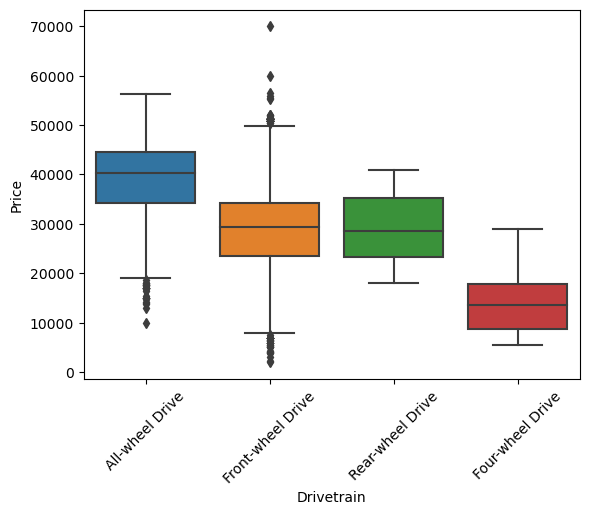

<Figure size 640x480 with 0 Axes>

In [45]:
sns.boxplot(x=honda_data.Drivetrain, y=honda_data.Price)
plt.xticks(rotation=45)
plt.show()
plt.clf()

All wheel drive cars tend to be more expensive, because they have more components and assembly required to produce them and possibly because they have a higher demand by consumers

In [46]:
honda_data.info()

display(honda_data.Drivetrain.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             4575 non-null   int64  
 1   Condition        4575 non-null   object 
 2   Price            4575 non-null   float64
 3   Consumer_Rating  4575 non-null   float64
 4   Drivetrain       4570 non-null   object 
 5   Fuel_Type        4575 non-null   object 
 6   Mileage          4575 non-null   int64  
 7   State            4575 non-null   object 
 8   MPG_max          4575 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 357.4+ KB


Front-wheel Drive    2296
All-wheel Drive      2191
Four-wheel Drive       71
Rear-wheel Drive       12
Name: Drivetrain, dtype: int64

In [47]:
honda_data.dropna(inplace=True)

## 4 Price vs Fuel Type

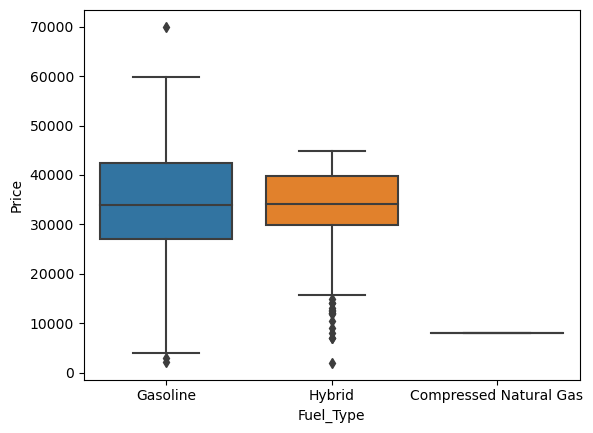

Gasoline                  4049
Hybrid                     520
Compressed Natural Gas       1
Name: Fuel_Type, dtype: int64

<Figure size 640x480 with 0 Axes>

In [48]:
sns.boxplot(x=honda_data.Fuel_Type, y=honda_data.Price)
plt.show()
plt.clf()
display(honda_data.Fuel_Type.value_counts())

In [49]:
# Removing row with CNG as fuel type (only 1 value in entire dataframe)
honda_data = honda_data[honda_data.Fuel_Type != 'Compressed Natural Gas']

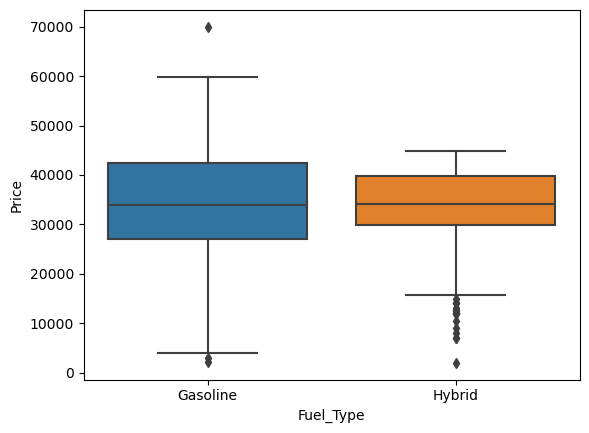

Gasoline    4049
Hybrid       520
Name: Fuel_Type, dtype: int64

<Figure size 640x480 with 0 Axes>

In [50]:
sns.boxplot(x=honda_data.Fuel_Type, y=honda_data.Price)
plt.show()
plt.clf()
display(honda_data.Fuel_Type.value_counts())

- There is not much difference in the median, 25% and 75% values of each fuel type, 
- But a much wider overall range for the gasoline versions

## 5 Price vs Mileage


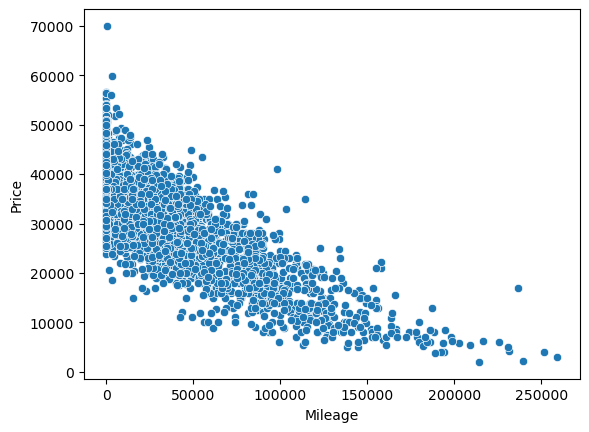

<Figure size 640x480 with 0 Axes>

In [51]:
sns.scatterplot(x=honda_data.Mileage, y=honda_data.Price)
plt.show()
plt.clf()

- As expected, a car with lower mileage has a higher associated price and there is a linear relationship based on the graph 

## 6 Price vs State


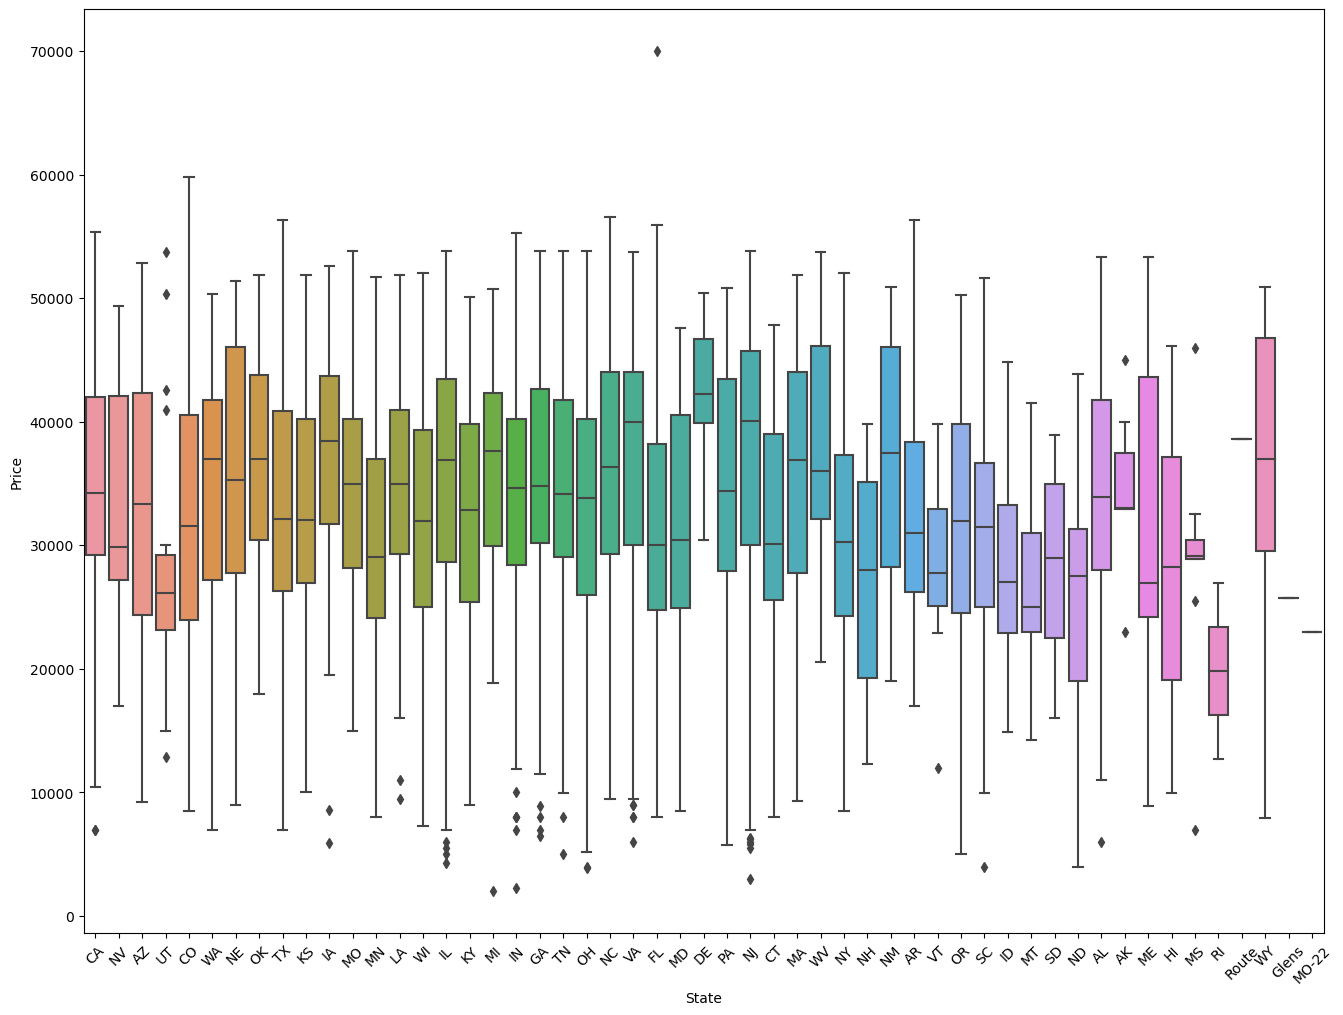

IL       319
FL       313
TX       281
CA       280
OH       229
IN       187
NC       179
NY       177
VA       159
NJ       148
GA       146
MN       143
PA       128
TN       122
WA       121
MA       121
MO       114
IA       100
WI       100
LA        93
MI        88
AZ        78
MD        76
CO        73
CT        71
OK        66
KY        65
NE        64
KS        62
AL        61
OR        57
AR        54
SC        41
NV        37
WV        29
UT        23
ID        19
NH        17
ME        17
SD        17
ND        16
VT        14
NM        13
DE        12
MT         9
MS         9
AK         7
WY         6
HI         3
RI         2
Route      1
Glens      1
MO-22      1
Name: State, dtype: int64

<Figure size 640x480 with 0 Axes>

In [52]:
fig = plt.figure(figsize=(16,12))
sns.boxplot(x=honda_data.State, y=honda_data.Price)
plt.xticks(rotation=45)
plt.show()
plt.clf()

display(honda_data.State.value_counts())

In [53]:
# Should remove the last 3 values : 
# - Route, Glens, MO-22
honda_data = honda_data[~honda_data.State.isin(['Route', 'Glens', 'MO-22'])]

In [54]:
state_price_sorted = honda_data.groupby(['State']).Price.median().sort_values(ascending=True)

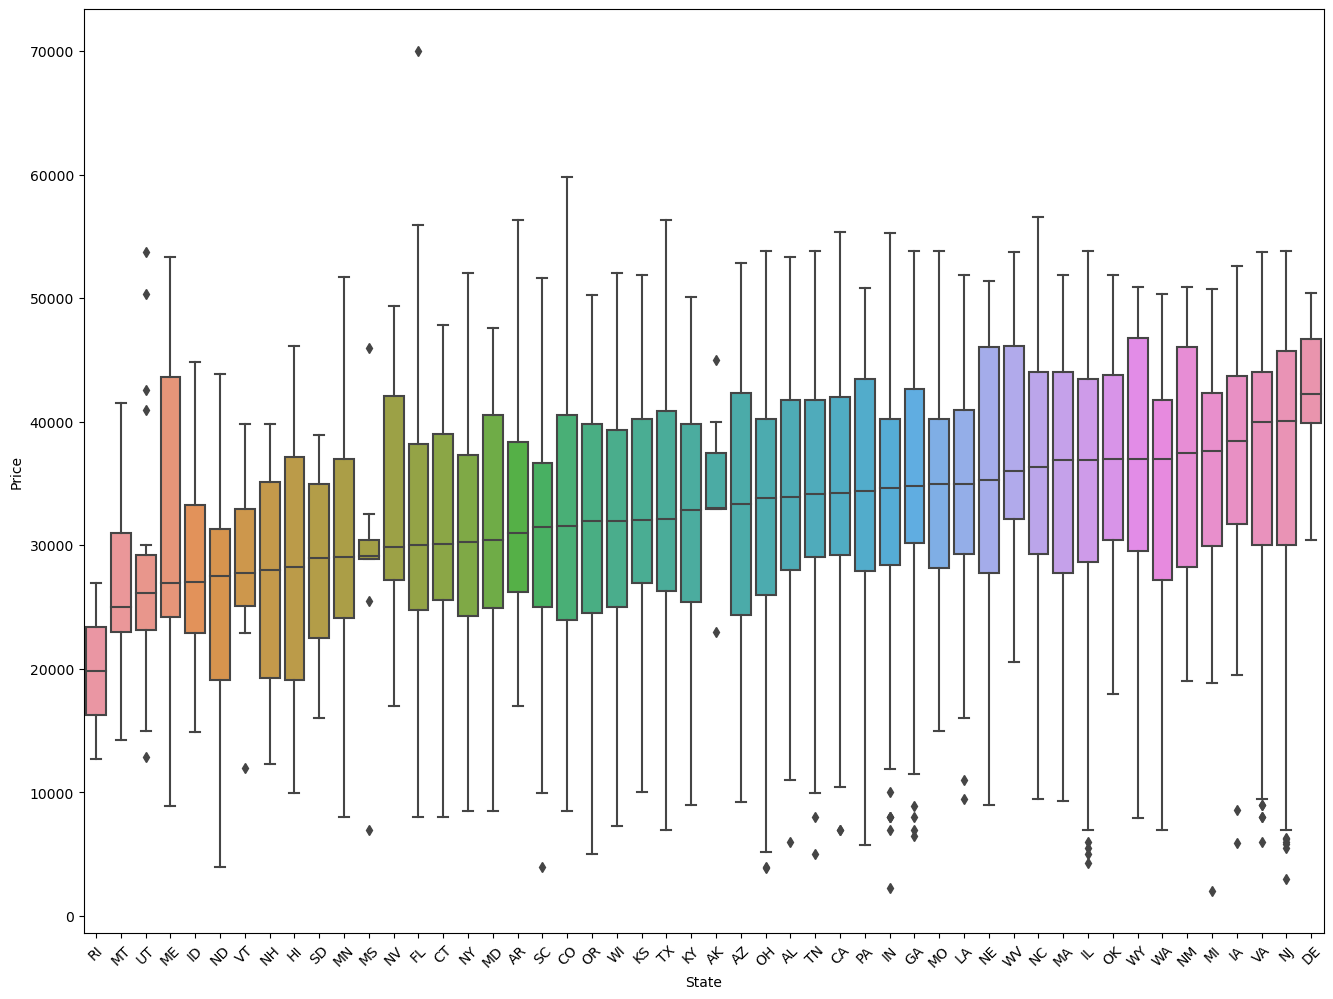

<Figure size 640x480 with 0 Axes>

In [55]:
fig = plt.figure(figsize=(16,12))
sns.boxplot(x=honda_data.State, y=honda_data.Price, order=state_price_sorted.index)
plt.xticks(rotation=45)
plt.show()
plt.clf()


There is some variation from state to state for the average price for all cars, however, it remains to be seen whether it contributes enough in a linear regression.

## 7 Price vs MPG_Max


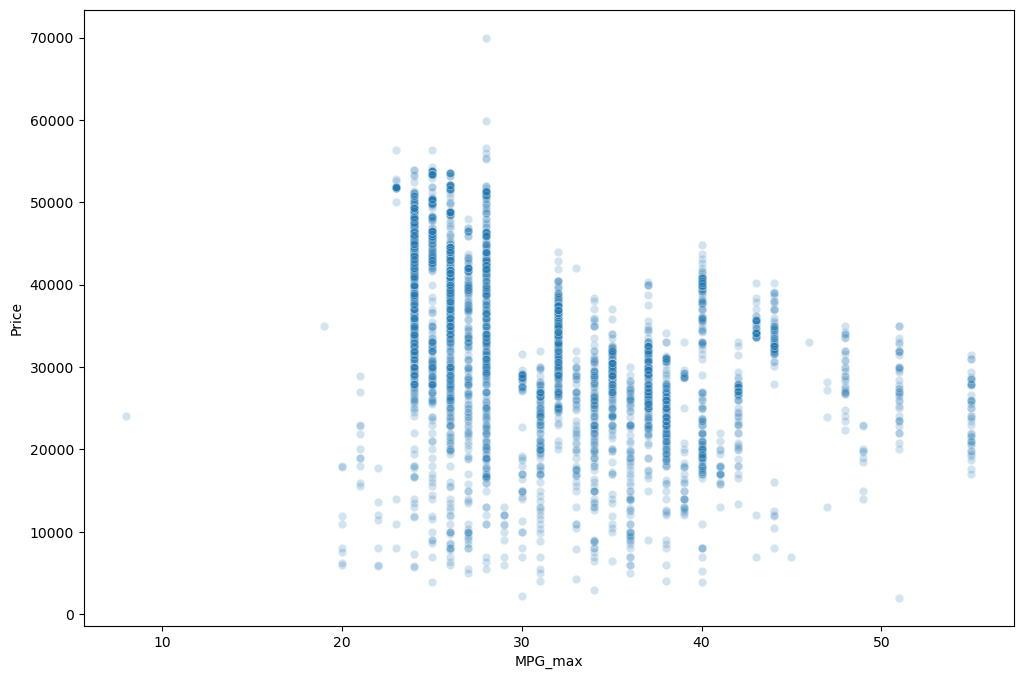

<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=honda_data.MPG_max, y=honda_data.Price, alpha=0.2)
plt.show()
plt.clf()

There is a slight correlation, where higher MPG values have lower prices, but there are a lot of values clustered around the 25-30 MPG range.

## 8 Price vs Condition


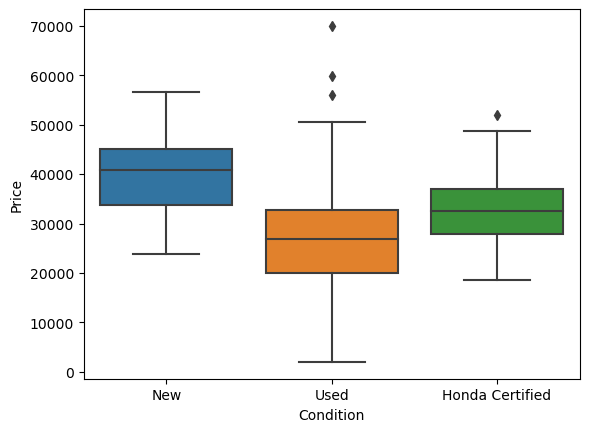

New                2365
Used               1924
Honda Certified     277
Name: Condition, dtype: int64

<Figure size 640x480 with 0 Axes>

In [57]:
sns.boxplot(x=honda_data.Condition, y=honda_data.Price)
plt.show()
plt.clf()
display(honda_data.Condition.value_counts())

As expected, new cars have a higher price tag than used cars, and honda certified vehicles are slightly more expensive that used cars. This is most likely because the certified rating carries a higher reliability that the vehicle is as advertised.

## 9 Price vs Consumer Rating


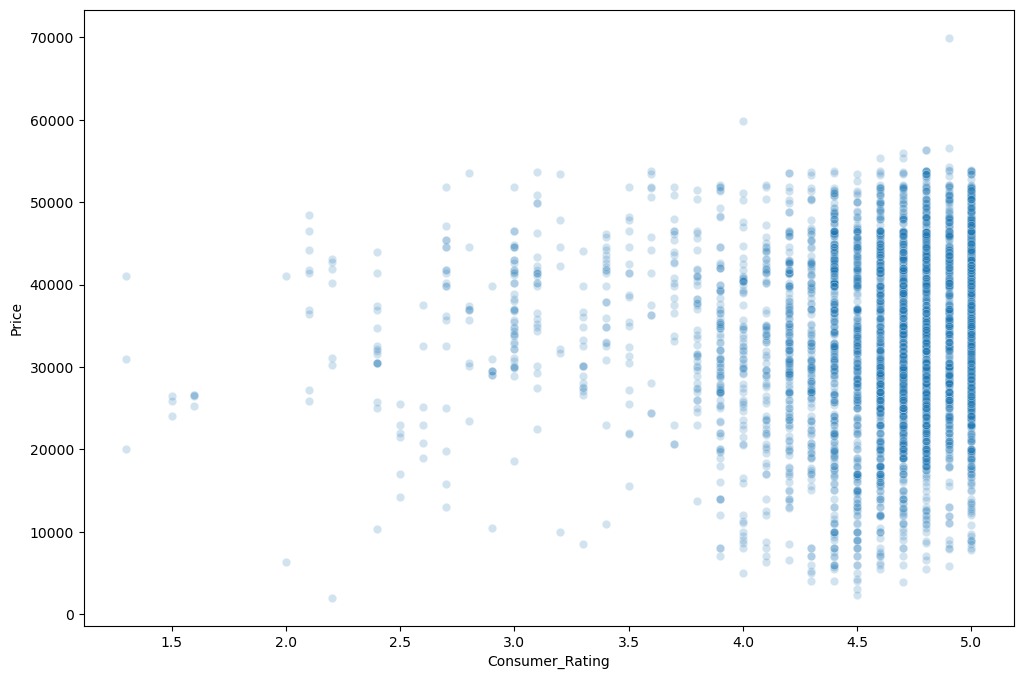

<Figure size 640x480 with 0 Axes>

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=honda_data.Consumer_Rating, y=honda_data.Price, alpha=0.2)
plt.show()
plt.clf()

No correlation is visible in the graph, as most values are clustered at the high end of the rating range, and doesn't form any sort of linear association.

### Correlation
A table of the correlations will be analyzed to determine how the continuous variables interact with the Price.

In [59]:
honda_data.corr(numeric_only = True)

,Year,Price,Consumer_Rating,Mileage,MPG_max
Year,1.000000,0.723464,0.060297,-0.837630,-0.014256
Price,0.723464,1.000000,0.046199,-0.750203,-0.414658
Consumer_Rating,0.060297,0.046199,1.000000,-0.049616,-0.019929
Mileage,-0.837630,-0.750203,-0.049616,1.000000,0.054983
MPG_max,-0.014256,-0.414658,-0.019929,0.054983,1.000000


Mileage and Year are the most correlated with Price, with the MPG_max being slightly correlated.
The consumer rating has almost no correlation with the Price, meaning this could potentially be dropped in our Regression.

Mileage and Year are also very correlated, because cars that are older tender to have more mileage, and it tends to be in a linear pattern since people tend to drive cars the same amount each year.

In [60]:
honda_data.describe(include='all')

,Year,Condition,Price,Consumer_Rating,Drivetrain,Fuel_Type,Mileage,State,MPG_max
count,4566.000000,4566,4566.000000,4566.000000,4566,4566,4566.000000,4566,4566.000000
unique,NaN,3,NaN,NaN,4,2,NaN,50,NaN
top,NaN,New,NaN,NaN,Front-wheel Drive,Gasoline,NaN,IL,NaN
freq,NaN,2365,NaN,NaN,2293,4046,NaN,319,NaN
mean,2020.484669,NaN,33603.188130,4.586246,NaN,NaN,24144.709593,NaN,31.147394
std,3.563058,NaN,10261.906351,0.503933,NaN,NaN,37456.887102,NaN,6.784684
min,1992.000000,NaN,1995.000000,1.300000,NaN,NaN,0.000000,NaN,8.000000
25%,2019.000000,NaN,26995.500000,4.500000,NaN,NaN,5.000000,NaN,26.000000
50%,2022.000000,NaN,33855.000000,4.700000,NaN,NaN,111.500000,NaN,28.000000
75%,2023.000000,NaN,41770.000000,4.900000,NaN,NaN,37723.750000,NaN,36.000000


# Linear Regression

The following is a multiple linear regression, that will be used to predict Prices based on the variables in the dataframe.

First, the data will be split into the predictors and target, followed by creating dummies for the categorical variables.
This is because the categorical variables are coded currently as text, and the model needs it as numbers to run properly.
The continuous data must be scaled, or standardized, because some of the variables have very differing scales. Such as the mileage is in the range of thousands or hundreds of thousands, whereas the MPG is in the order of tens.

After this, the categorical and numerical data will be brought together and split into test/train before the linear regression is instantiated and fit to the training data.

And finally, the score and other metrics will be calculated to evaluate the model.

In [61]:
# Separating predictors from target variable
honda_lr = honda_data.copy()
X = honda_lr.drop('Price', axis=1)
y = honda_lr['Price']

In [62]:
# The following columns need to be one hot encoded because they are categorical variables:
# Condition, Drivetrain, Fuel_Type, State

Dummies = pd.get_dummies(honda_lr[['Condition', 'Drivetrain', 'Fuel_Type', 'State']])
X_num = X.drop(columns=['Condition', 'Drivetrain', 'Fuel_Type', 'State'])

In [63]:
# Scaling the numerical data
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [64]:
# Creating feature dataframe
X_num = pd.DataFrame(X_num_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_num, Dummies], axis=1)

In [65]:
# Visualization of features
display(X.head(10))

,Year,Consumer_Rating,Mileage,MPG_max,Condition_Honda Certified,Condition_New,Condition_Used,Drivetrain_All-wheel Drive,Drivetrain_Four-wheel Drive,Drivetrain_Front-wheel Drive,Drivetrain_Rear-wheel Drive,Fuel_Type_Gasoline,Fuel_Type_Hybrid,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.706024,0.424217,-0.644404,-1.053575,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.706024,0.225757,-0.644644,1.747156,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.425336,0.821139,-0.644537,-0.906168,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.706024,-0.369625,-0.644537,1.304936,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.706024,-0.369625,-0.644537,-0.463948,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0.425336,0.821139,-0.644591,-0.758762,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0.706024,0.225757,-0.644537,0.125680,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0.706024,-0.568086,-0.644644,-0.906168,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
15,0.706024,-0.568086,-0.644644,-0.906168,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17,0.706024,-0.171165,-0.644270,1.304936,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
Honda_LR = LinearRegression().fit(X_train,y_train)

## Metrics

The error and score will be calculated for the predicted values of this dataset.
The train and test scores for the linear regression will be compared to validate that the model is not overfitting.

Three different types of errors will be calculated and re-run with some modifications in the model to determine if there is any room for improvement.

In [68]:
score_train = Honda_LR.score(X_train, y_train)
score_test = Honda_LR.score(X_test, y_test)
print('Train Score: ', score_train)
print('Test Score: ', score_test)

Train Score:  0.8270439720489446
Test Score:  0.8088804350065438


### Mean Squared Error (MSE)

In [69]:
y_pred_test = Honda_LR.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
print(mse)

20141371.663293216


In [70]:
y_pred_train = Honda_LR.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print(mse)

18181525.117709473


Based on the comparison of values of the train/test MSE, the model might be slightly overfitting the data, but not by much.
A Lasso Regularization method will be performed later with a GridsearchCV to try and improve the model.

### Root Mean Squared Error (RMSE)

In [71]:
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(rmse_test)

4487.913954533132


### Mean Absolute Error (MAE)

In [72]:
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

3292.3998905908097


Comparing the MAE, to the mean and median price of cars in the dataset (\\$33,603 & \\$33,855), it is about a 10% difference. The higher value for RMSE indicates there are some predicted values with a larger error, but the difference is not high enough to cause concern.


### Coefficients and Plot of Coefficients

With a plot of the coefficients, we can visually inspect how each variable affects the price.

In [73]:
coef = pd.Series(Honda_LR.coef_, X.columns).sort_values()
print(coef)

Fuel_Type_Gasoline             -4.250553e+13
Fuel_Type_Hybrid               -4.250553e+13
MPG_max                        -6.301319e+03
Mileage                        -3.307696e+03
Consumer_Rating                 1.030952e+02
Year                            3.421368e+03
State_RI                        1.450516e+13
State_CT                        1.450516e+13
State_MS                        1.450516e+13
State_KS                        1.450516e+13
State_MD                        1.450516e+13
State_SD                        1.450516e+13
State_ID                        1.450516e+13
State_AZ                        1.450516e+13
State_NH                        1.450516e+13
State_FL                        1.450516e+13
State_NY                        1.450516e+13
State_TX                        1.450516e+13
State_NV                        1.450516e+13
State_LA                        1.450516e+13
State_MA                        1.450516e+13
State_TN                        1.450516e+13
State_NM  

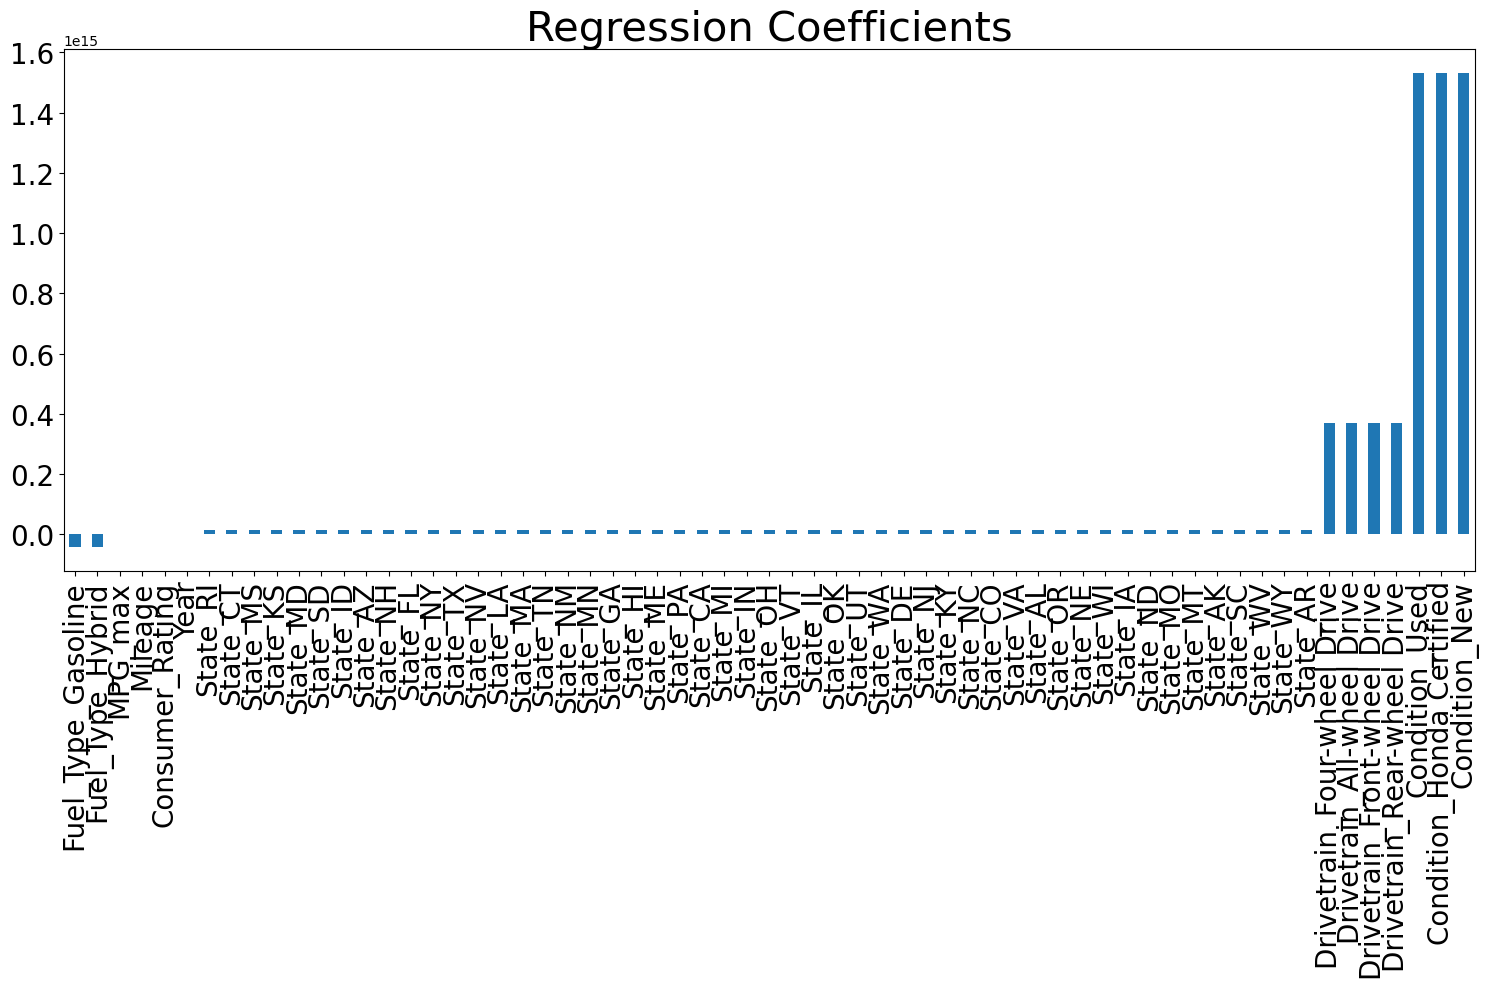

In [74]:
plt.figure(figsize = (15,10))
coef.plot(kind='bar', fontsize = 20)
plt.title ("Regression Coefficients", fontsize = 30)
plt.tight_layout()
plt.show()

Based on the plot of the coefficients, the variables with highest magnitude are the drivetrain types and also what condition the vehicle is in. The values for each State are much lower and MPG_max, Mileage, Consumer Rating, and Year are insignificant when compared to the others.

## Lasso regularization

Because there was a difference between the MSE for the train and test, a Lasso regularization will be performed to try and improve the model. GridsearchCV will be used in conjunction to find the best alpha value.

In [75]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [76]:
# Creation of alpha array to use as points in the search
alpha_array = np.logspace(-6, 1, 100)

tuned_parameters = [{'alpha': alpha_array}]

In [77]:
# Creation of GridSearchCV instance
# Lasso initially had error, tol was changed to be greater than default value of 0.0001
model = GridSearchCV(estimator = Lasso(tol=0.01), param_grid = tuned_parameters, \
                     scoring = 'neg_root_mean_squared_error', cv = 5, return_train_score = True)
model.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(tol=0.01),
             param_grid=[{'alpha': array([1.00000000e-06, 1.17681195e-06, 1.38488637e-06, 1.62975083e-06,
       1.91791026e-06, 2.25701972e-06, 2.65608778e-06, 3.12571585e-06,
       3.67837977e-06, 4.32876128e-06, 5.09413801e-06, 5.99484250e-06,
       7.05480231e-06, 8.30217568e-06, 9.77009957e-06, 1.14975700e-05,
       1.35304777e-05, 1.59228279e-05, 1.873817...
       4.53487851e-01, 5.33669923e-01, 6.28029144e-01, 7.39072203e-01,
       8.69749003e-01, 1.02353102e+00, 1.20450354e+00, 1.41747416e+00,
       1.66810054e+00, 1.96304065e+00, 2.31012970e+00, 2.71858824e+00,
       3.19926714e+00, 3.76493581e+00, 4.43062146e+00, 5.21400829e+00,
       6.13590727e+00, 7.22080902e+00, 8.49753436e+00, 1.00000000e+01])}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [78]:
print(model.best_params_, model.best_score_)

{'alpha': 7.220809018385457} -4404.508235596691


7.22 is the optimal alpha for the given model, with a score of 4404 for the RMSE.
This is mot much different than the first linear regression, so it seems initially that there is not much improvement in this specific model.

### Plot of GridSearchCV alpha values and scores

A plot will be shown to visually represent the search for best alpha value

In [79]:
test_scores = model.cv_results_['mean_test_score']
test_scores = test_scores*-1
train_scores = model.cv_results_['mean_train_score']
train_scores = train_scores*-1

[]

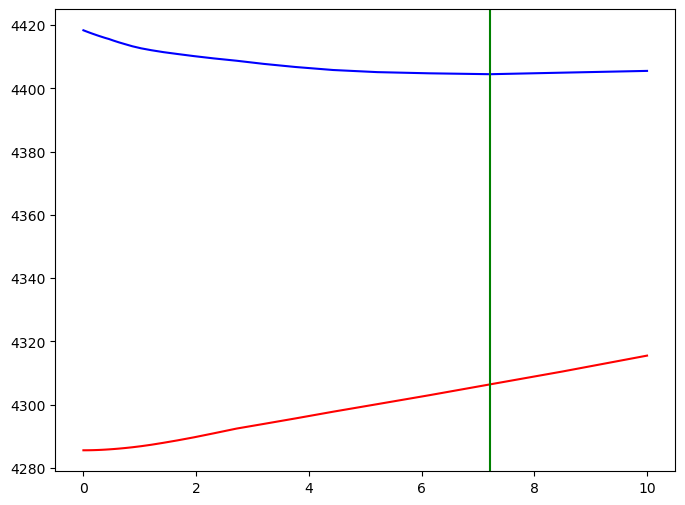

In [80]:
plt.figure(figsize=(8,6))
plt.plot(alpha_array, test_scores, color='blue')
plt.plot(alpha_array, train_scores, color='red')
plt.axvline(7.22, color='green')
plt.plot()

## Lasso Optimized Regression

A lasso regression will be run with the optimized alpha value (7.22) to compare the metrics with the non-optimized regression.

In [81]:
lasso1 = Lasso(alpha=7.22)
lasso1.fit(X_train,y_train)


Lasso(alpha=7.22)

## Metrics


In [82]:
score_train = lasso1.score(X_train, y_train)
score_test = lasso1.score(X_test, y_test)
print('Train Score: ', score_train)
print('Test Score: ', score_test)

Train Score:  0.8255211373869161
Test Score:  0.8092150405358057


There is still a slight difference between the train and test scores, but this is because they cannot be the same based on the graph above. 

### Mean Squared Error (MSE)

In [83]:
y_pred = lasso1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

20106108.84587478


### Root Mean Squared Error (RMSE)

In [84]:
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
print(rmse_test)

4483.983591169216


### Mean Absolute Error (MAE)

In [85]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

3273.5418623021706


The error comparison before and after optimization (original is in parenthesis)

RMSE: 4483 (4487)

MAE: 3273 (3292)

### Coefficients and Plot of Coefficients

In [86]:
coef = pd.Series(lasso1.coef_, X.columns).sort_values()
print(coef)

Fuel_Type_Gasoline             -10698.200412
MPG_max                         -6223.492505
Drivetrain_Four-wheel Drive     -5620.988623
Mileage                         -3416.585537
State_CT                        -1003.197463
State_MD                         -732.014747
State_FL                         -713.593507
Condition_Used                   -703.861737
State_NY                         -701.359497
State_TX                         -619.633550
State_KS                         -521.122884
State_AZ                         -499.693421
State_LA                         -332.156773
State_MA                         -205.546471
State_MN                         -141.792981
State_TN                          -89.502304
Drivetrain_All-wheel Drive        -86.205009
State_MI                           -0.000000
State_WA                            0.000000
State_MS                           -0.000000
State_MT                            0.000000
State_ND                            0.000000
State_NH  

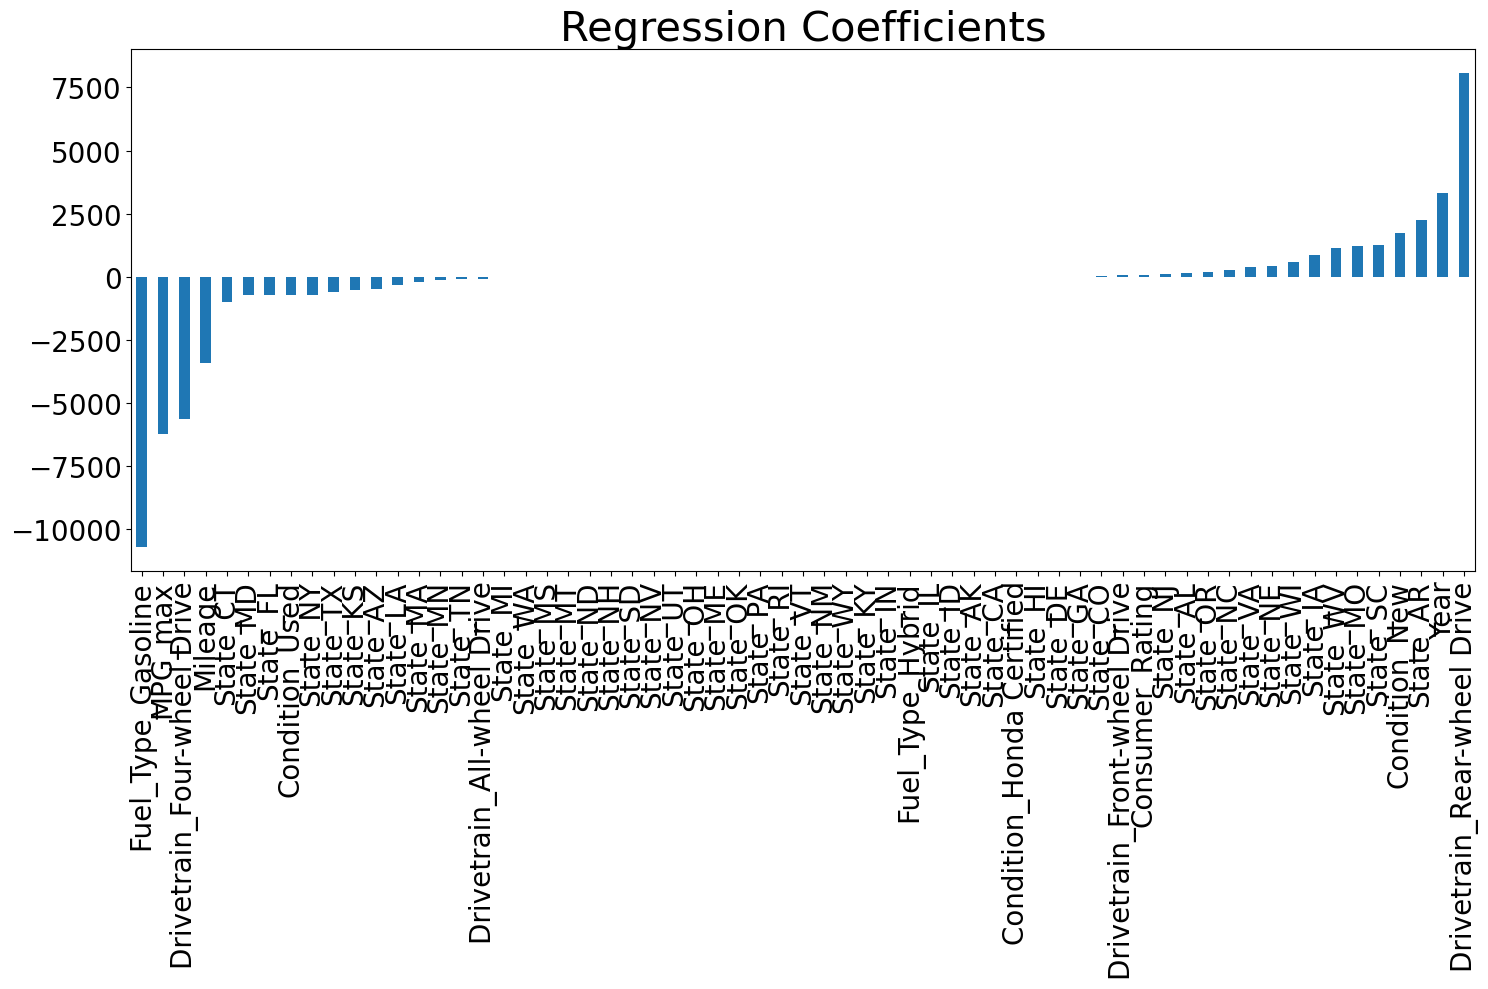

In [87]:
plt.figure(figsize = (15,10))
coef.plot(kind='bar', fontsize = 20)
plt.title ("Regression Coefficients", fontsize = 30)
plt.tight_layout()
plt.show()

Based on the graph and series, many of the coefficients have been changed to 0 by the Lasso regression.
In addition, the absolute value of all coefficients has decreased drastically, with many of them on the same or similar scale, unlike before.

# Conclusion

The main goal of the project was reached, and the linear regression has a good score (around 0.80 for the train and test data), with a reasonable MAE and RMSE.

This regression could be used as a tool to predict how much a vehicle's value should be based on some characteristics. Although it won't be able to predict the price exactly, this model could be used to give an average, with a range for any specific vehicle.

Improvement could certainly be made by doing some of the following:

- Increase the amount of data points, with more kinds of vehicles if possible, and older vehicles specifically
- Use some of the features that were dropped, such as color and different ratings
- Feature engineering to combine some features into a new distinct feature